<a href="https://colab.research.google.com/github/jayy1809/point-processing-image-enhancement/blob/main/21BCP108_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Point Processing based Image enhancements**


***Name : Jay Panchal***

***Roll No : 21BCP108***

***Div 2, G4***

S = T(r)

r is the value of pixel before procdessing

S = value of pixel after processing

T ->  transformation function

Image transformation consists of linear, logarithmic and power law

total length of gray level as L
0 is represented as Black and L-1 is represented as White

**IMAGE NEGATIVE , it is represented by S = L-1-r  it will give the inverse value of the pixel**

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

In [7]:
# Jay Panchal
# 21BCP108

def image_negative(path):
  img = Image.open(path)
  img_negative = Image.eval(img, lambda x: 255 - x)
  return img_negative

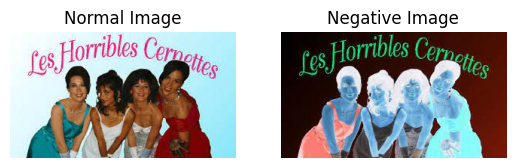

In [11]:
# Jay Panchal
# 21BCP108

path = "download.jpg"
neg_img = image_negative(path)

normal = Image.open(path)

plt.subplot(1, 2, 1)
plt.imshow(normal)
plt.title('Normal Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(neg_img)
plt.title('Negative Image')
plt.axis('off')

plt.show()

# fig , axes = plt.subplots(1,2, figsize=(10,8))

# axes[0].imshow(normal)
# axes[0].set_title("Normal Image")
# axes[0].axis("off")

# axes[1].imshow(neg_img)
# axes[1].set_title("negative Image")
# axes[1].axis("off")

# plt.show()

**LOG transformation**
s = T(r) = c*log(1+r)
c = 255/log(1+max), c is a constant
as for 8 bit image the max value is 255

the low intensity values in the input image are mapped to a wider range of output levels and same is true for higher intensity values

it expands the dark pixels in the image while compressing the brighter pixels



Text(0, 0.5, 'pixel intensity after transformation')

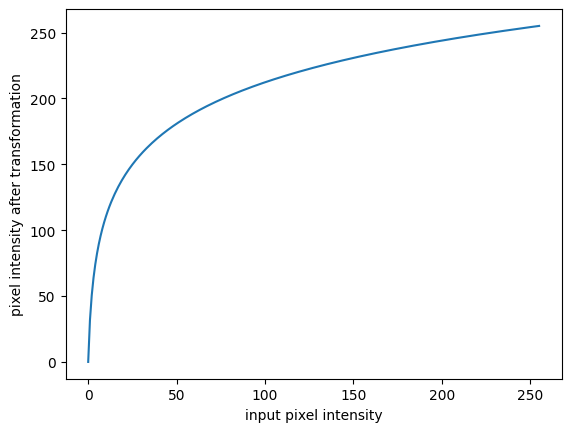

In [14]:
# Jay Panchal
# 21BCP108

import numpy as np
r = np.arange(0,256) # this will create an array with values from 0 to 255 which represents input pixel
c = 255/(np.log(1+255))
s = c*np.log(1+r)

plt.plot(r,s)
plt.xlabel("input pixel intensity")
plt.ylabel("pixel intensity after transformation")

In [15]:
# Jay Panchal
# 21BCP108

def log_transformation(path):
  img = Image.open(path)
  c = 255/np.log(1+255)
  log_image = Image.eval(img, lambda x: c*(np.log(1+x)))
  return log_image

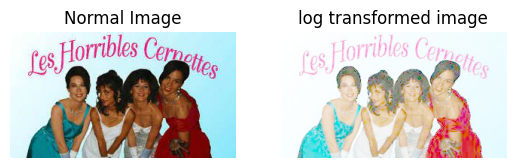

In [16]:
# Jay Panchal
# 21BCP108

path = "download.jpg"
log_img = log_transformation(path)

normal = Image.open(path)

plt.subplot(1, 2, 1)
plt.imshow(normal)
plt.title('Normal Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(log_img)
plt.title('log transformed image')
plt.axis('off')

plt.show()

**Inverse Log Transformation**

it is inverse of log transformation hence here it expands the values of light level pixels while compressing the darker-level values

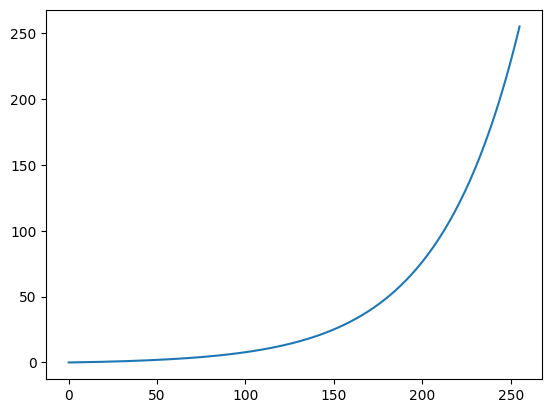

In [18]:
# Jay Panchal
# 21BCP108

r = np.arange(0,256)
c = 255/np.log(1+255)
s = np.exp(r/c) - 1 #s = np.exp(r)**(1/c) - 1

plt.plot(r,s)

In [21]:
# Jay Panchal
# 21BCP108

def inverse_log(path):
  img = Image.open(path)
  c = 255/np.log(1+255)
  inv_log_img = Image.eval(img, lambda x: (np.exp(x/c)) - 1)
  return inv_log_img

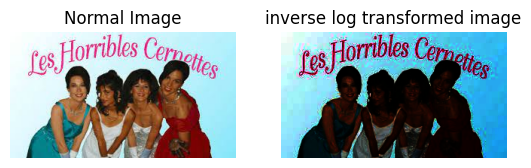

In [22]:
# Jay Panchal
# 21BCP108

path = "download.jpg"
inv_log_img = inverse_log(path)

normal = Image.open(path)

plt.subplot(1, 2, 1)
plt.imshow(normal)
plt.title('Normal Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(inv_log_img)
plt.title('inverse log transformed image')
plt.axis('off')

plt.show()

***Gamma transformations Power-Law transformations ***

s = cr^(gamma)
here c and gamma are constants

with fractional values (0 < gamma < 1) of gamma map a narrow range of dark input values into a wider range of output values, with the opposite being true for higher values (gamma > 1) of input levels

gamma = 1 is identity transformations

In [60]:
# Jay Panchal
# 21BCP108

def gamma_transformation(path, y): # here y is gamma
  img = Image.open(path)
  # c = 255/np.log(1+255)
  gamma_image = Image.eval(img, lambda x: int(255 * (((x/255) if x != 0 else 1) ** y)))
  return gamma_image

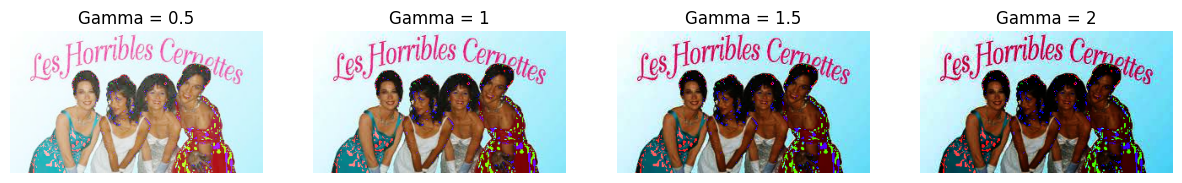

In [62]:
# Jay Panchal
# 21BCP108

path = "download.jpg"
normal = Image.open(path)
gamma_values = [0.5, 1 , 1.5 ,2]
images = []  # Initialize an empty list to collect images

for gamma in gamma_values:
    image = gamma_transformation(path, gamma)
    images.append(image)  # Append each image to the list

plt.figure(figsize=(15, 5))


for i, image in enumerate(images):
    plt.subplot(1, len(gamma_values), i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Gamma = {gamma_values[i]}")
    i += 1
plt.show()



# path = "download.jpg"
# normal = Image.open(path)
# gamma_values = [0.5, 1.5, -0.5, -1.5]
# images = []
# for gamma in gamma_values:
#   image = gamma_transformation(path, gamma)
#   images.append(image)

# i=1
# for image in images:
#   img = Image.open(image)
#   plt.subplot(1,4,i)
#   i+=1